# AnyoneAI - Project I

# An analysis of NBA players in the 2021/2022 season

Hi! this is the first of several projects we're going to be working on during this course. 
You will be expected to finish this on your own, but you can use the available channels on Discord to ask questions and help others. Please read the entire notebook before starting, this will give you a better idea of what you need to accomplish.

This project will rely heavily in the use of API as data sources. Contrary to most machine learning challenges and competitions, working in the industry usually requires the ML Developer to work with multiple teams and use heterogeneous sources of information to get the necessary data to solve a particular problem. Access to data is often provided through application programming interfaces (APIs), whether internal or external to the organization. It is very important to understand how to interact with APIs to collect data in our day to day work.

You might be wondering: why basketball? The main reason is availability of data.

The sport is played at a fast pace, with hundreds of plays in each single game, thousands of games in a season, and with a relatively small amount of on-court players, which gives them a lot of interactions with the ball, which in turn provides an oportunity to collect a great amount of data about each player performance.

These are the objectives of the project:
- Understanding how to query an API to create a dataset with Python and Pandas
- Learning how to cleanup a dataset and generate new fields from calculated data
- Storing the created dataset in a serialized manner
- Generating statistics about the data
- Visualizing data

## Introduction

### A brief description of basketball and the NBA

The National Basketball Association is the main basketball league in the United States of America. It currently features 30 teams from different cities, divided in 2 conferences (East and West) of 15 teams. Each team plays a total of 82 games during the regular season. After that, the 8 teams with better records from each conference are seeded in a playoff format, with the winner of each conference playing the finals to determine the eventual champion. NBA seasons usually play out between october of one year, to june of the next year, so for example the current season being played is called the 2021/2022 season.

As in most leagues in the world, the game is played 5 vs 5 players, with as many as 9 reserve players that can rotate with the starters as many times as the team wants. Games are played to 48 minutes, so the total amount of minutes of combined play time for any team in a single game with no added time is 240 minutes. If the score is tied at the end of the 48 minutes, 5 minutes of extra time are played, this continues until a winner is decided.

Even though they can play multiple positions, players are usually classified according to the following positions:

- Guards
    - Point Guards
    - Shooting Guards
- Forwards
    - Small Forwards
    - Power Forwards
- Centers

We will mainly focus on the three main positions: Guards/Forwards/Centers

### The dataset

You'll be in charge of creating our dataset. We want to create a single pandas dataframe with information about all active players in the current NBA season. 
The dataset needs to have the following structure:

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

Here is a sample of how the final result should look like:

In [1]:
import pandas as pd

sample_dict = {
    'PLAYER_NAME': {200765: 'Rajon Rondo',  203107: 'Tomas Satoransky',  204060: 'Joe Ingles'},
    'TEAM_NAME': {200765: 'Cavaliers', 203107: 'Wizards', 204060: 'Trail Blazers'},
    'POSITION': {200765: 'Guard', 203107: 'Guard', 204060: 'Forward'},
    'HEIGHT': {200765: 185, 203107: 201, 204060: 203},
    'WEIGHT': {200765: 82, 203107: 95, 204060: 100},
    'COUNTRY': {200765: 'USA', 203107: 'Czech Republic', 204060: 'Australia'},
    'BIRTHDATE': {200765: pd.Timestamp('1986-02-22 00:00:00'), 203107: pd.Timestamp('1991-10-30 00:00:00'), 204060: pd.Timestamp('1987-10-02 00:00:00')},
    'SEASON_EXP': {200765: 15, 203107: 5, 204060: 7},
    'DRAFT_NUMBER': {200765: '21', 203107: '32', 204060: 'Undrafted'},
    'GP': {200765: 957, 203107: 388, 204060: 590},
    'MIN': {200765: 29.9, 203107: 22.2, 204060: 25.7},
    'PTS': {200765: 9.8, 203107: 6.9, 204060: 8.6},
    'REB': {200765: 4.5, 203107: 2.9, 204060: 3.2},
    'AST': {200765: 7.9, 203107: 4.1, 204060: 3.8},
    'STL': {200765: 1.6, 203107: 0.8, 204060: 0.9},
    'BLK': {200765: 0.1, 203107: 0.2, 204060: 0.2},
    'GAME_DATE': {200765: pd.Timestamp('2022-04-10 00:00:00'), 203107: pd.Timestamp('2022-04-10 00:00:00'), 204060: pd.Timestamp('2022-04-10 00:00:00')},
    'SALARY': {200765: 2641691, 203107: 10468119, 204060: 14000000},
    'AGE': {200765: '36 years, 1 months, 19 days', 203107: '30 years, 5 months, 11 days', 204060: '34 years, 6 months, 8 days'}
}
pd.DataFrame(sample_dict)

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,SEASON_EXP,DRAFT_NUMBER,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
200765,Rajon Rondo,Cavaliers,Guard,185,82,USA,1986-02-22,15,21,957,29.9,9.8,4.5,7.9,1.6,0.1,2022-04-10,2641691,"36 years, 1 months, 19 days"
203107,Tomas Satoransky,Wizards,Guard,201,95,Czech Republic,1991-10-30,5,32,388,22.2,6.9,2.9,4.1,0.8,0.2,2022-04-10,10468119,"30 years, 5 months, 11 days"
204060,Joe Ingles,Trail Blazers,Forward,203,100,Australia,1987-10-02,7,Undrafted,590,25.7,8.6,3.2,3.8,0.9,0.2,2022-04-10,14000000,"34 years, 6 months, 8 days"


## Collecting information for building our dataset

In this section, we're only going to work on collecting the necessary raw data to build the required dataset. Don't worry about finishing everything here, we'll generate the appropiate fields and merge the data into a single dataframe in the next section.

To get the information, you can use any public and free API you can find, but you have to provide the code that gets the information here. We recommend using this API:
 
- https://github.com/swar/nba_api

    This is a Python library that can be used to obtain data from stats.nba.com, it provides a set of methods that abstracts you from making the http calls, but directly makes calls to nba stats page and parses the results. [Here](https://github.com/swar/nba_api/blob/master/docs/examples/Basics.ipynb) are a couple of examples on how to use it.
    

A few notes on data collection:

- Start simple. Try to get all the required information for 1 player, read the APIs documentation carefuly, then think about how to use them to collect all players data. 

- Please bear in mind that the most public APIs have some kind of rate limit, so you have to be careful about iterating on data and making lots of requests in a short amount of time (a 1 second delay between calls to the api should be enough). Once you've collected what you needed, save it to file in order to retrieve it later without calling the API again.

- A key consideration: we only want data about players that have played in the current season, so make sure to filter those out before collecting the rest of the information.

- There is at least one piece of information you're not going to find in both of those APIs: the player contract information. Again you can decide to use any source, but we recommend using information provided [here](https://www.basketball-reference.com/contracts/players.html), as it lets you export the data as a csv.  

1- Create a function to find all ACTIVE players, meaning players that are listed with a team in the 2021/2022 season. For now you only need the player id, name, and team. Save the dataframe to a csv named "nba_current_players_list.csv". The function should return the dataframe.

Hint: you should find an API method that can give you a list of players in just one call, this way we can filter those players we're interested in, and later will make calls for each specific player.

Consider dropping: 
- All players with TEAM_ID == 0
- All players with GAMES_PLAYED_FLAG == N
- Player with id 1630597 (This guy is a problem ;))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nba_api.stats.endpoints import commonallplayers,commonplayerinfo,playercareerstats,playerprofilev2
import time
from unidecode import unidecode
from dateutil import relativedelta
from datetime import date,datetime
import geopandas as gpd
from tqdm.notebook import tqdm

In [4]:
### Complete in this cell: get all active players from the api

def get_and_save_players_list():
    '''
    This function get all the active players in this season from the NBA-API. 
    The parameters in the API are:
    is_only_current_season=Flag (1 to be the current season)
    LeagueID=00 for NBA league. aba=01, g_league=20,wnba=10
    Season=2021-22 for this season.
    
    The function then filters some values to be more accurate in the next steps. 
    Return the Person ID, the fullname and the team name.
    '''
    players = commonallplayers.CommonAllPlayers(is_only_current_season=1,
                                               league_id= '00',
                                               season='2021-22') 
    df_all_players=players.get_data_frames()[0]

    mask_team_id= df_all_players['TEAM_ID']==0
    mask_games_played_flag= df_all_players['GAMES_PLAYED_FLAG']=='N'
    mask_person_id= df_all_players['PERSON_ID']==1630597
    mask_new_person_id= df_all_players['PERSON_ID']==1630492
    #This new player was incorporated the last days. The mentor decided to remove it.
    
    index_list=df_all_players[mask_team_id|mask_games_played_flag|mask_person_id|mask_new_person_id].index.to_list()
    #make a list of index to put in the drop function argument.

    df_all_players=df_all_players.drop(labels=index_list)
    
    return (df_all_players[['PERSON_ID','DISPLAY_FIRST_LAST','TEAM_NAME']])
    

In [5]:
current_players_list = get_and_save_players_list()
current_players_list.to_csv("nba_current_players_list.csv")

In [6]:
current_players_list

,PERSON_ID,DISPLAY_FIRST_LAST,TEAM_NAME
0,1630173,Precious Achiuwa,Raptors
1,203500,Steven Adams,Grizzlies
2,1628389,Bam Adebayo,Heat
3,1630583,Santi Aldama,Grizzlies
4,200746,LaMarcus Aldridge,Nets
...,...,...,...
612,1628221,Gabe York,Pacers
613,201152,Thaddeus Young,Raptors
614,1629027,Trae Young,Hawks
615,1630209,Omer Yurtseven,Heat


2- Create a function to find the personal information of all players listed in the dataframe created in the previous step, and save it to a csv file named "nba_players_personal_info.csv". The function should also return the created dataframe.

player_id (int) (INDEX)
player_name (str)
team_name (str)
position (str)
height (int) (in centimeters)
weight (float) (in kilograms)
country of origin (str)
date_of_birth (datetime)
age (str) (years and months)
years_of_experience (int) (years since entering the league)
Draft position (int)

OPTIONAL: iterating on a list of players and making API calls can be complex and full of errors, try a code block that handles exceptions (for example a timeout from the API) and returns the partial result before it failed, you could also save the partial information to disk.

In [7]:
### Complete in this cell: Find players personal information (name, age, dob, etc), store the information in a CSV file.


def get_players_personal_information(current_players_list):
     
    '''
    This function get all the personal information from the NBA-API. 
    The parameters in the API are:
    player_id= a unique code to identify a player.
    
    The function call the api for each person id in the current season. After that store this information
    in a data frame.
    Return the Person ID, the fullname, the team name, the position who play, height and weight of each player,
    country of origin, birthdate, years of experience in nba league and the draft number.
    '''
    
    list_person_id=current_players_list['PERSON_ID'].to_list()
    
    df_all_player_personal_info=pd.DataFrame()
    #create an empty data frame to then concatenate all the singular player information in one df.
    
    id_failed_personal_info=[]
    #create an empty list to store all the person_id that was failed.
    
    for person_id in tqdm(list_person_id):
        try:
            player_info = commonplayerinfo.CommonPlayerInfo(player_id=person_id)
            
            df_player_info=player_info.get_data_frames()[0]
            df_all_player_personal_info=pd.concat([df_all_player_personal_info, df_player_info], axis=0)

            time.sleep(0.5)
        #This sleep its use to not generate a lot of requests per second and the API block your code.
        except:
            id_failed.append(id_failed_personal_info)
            print('The request has failed. The player_id that failed was: ', id_failed_personal_info)
            df_all_player_personal_info_until_failed=df_all_player_personal_info
            print('The dataframe until the exception occurred was: ')
            display(df_all_player_personal_info_until_failed)
            
    
    df_all_player_personal_info=df_all_player_personal_info[['PERSON_ID','DISPLAY_FIRST_LAST','TEAM_NAME',
                                                         'POSITION','HEIGHT','WEIGHT','COUNTRY','BIRTHDATE',
                                                         'SEASON_EXP', 'DRAFT_NUMBER']]
    
    
    df_all_player_personal_info=df_all_player_personal_info.rename(columns={'DISPLAY_FIRST_LAST': 'PLAYER_NAME',
                                                                        'SEASON_EXP': 'YEARS_OF_EXPERIENCE',
                                                                        'DRAFT_NUMBER': 'DRAFT_POSITION'})
    
    df_all_player_personal_info=df_all_player_personal_info.set_index('PERSON_ID',drop=False)

    
    return df_all_player_personal_info


In [8]:
players_personal_info = get_players_personal_information(current_players_list)
players_personal_info.to_csv("nba_players_personal_info.csv")

  0%|          | 0/503 [00:00<?, ?it/s]

In [9]:
players_personal_info

,PERSON_ID,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,YEARS_OF_EXPERIENCE,DRAFT_POSITION
PERSON_ID,,,,,,,,,,
1630173,1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20
203500,203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12
1628389,1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14
1630583,1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30
200746,200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2
...,...,...,...,...,...,...,...,...,...,...
1628221,1628221,Gabe York,Pacers,Guard,6-3,190,USA,1993-08-02T00:00:00,0,Undrafted
201152,201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12
1629027,1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5


3- Create a function to find players career statistics, store the information in a CSV file called "nba_players_career_stats.csv"

Player career statistics
    games played (int)
    minutes per game (float)
    points per game (float)
    rebounds per game (float)
    assists per game (float)
    steals per game (float)
    blocks per game (float)

- Games played (int) # GP:  The number of games played
- Minutes per game (float) # MIN: The number of minutes played by a player or team
- Points per game (float) # PTS: The number of points scored
- Rebounds per game (float) # REB:  A rebound occurs when a player recovers the ball after a missed shot. This statistic is the number of total rebounds a player or team has collected on either offense or defense
- Assists per game (float) # AST:  The number of assists -- passes that lead directly to a made basket -- by a player
- Steals per game (float) # STL: Number of times a defensive player or team takes the ball from a player on offense, causing a turnover
- Blocks per game (float) # BLK: Blocks

https://www.nba.com/stats/help/glossary/

In [10]:

def get_players_career_stats(current_players_list):
    '''
    This function get all the statistics information of each player from the NBA-API. 
    The parameters in the API are:
    player_id= a unique code to identify a player.
    per_mode36= if you want totals statistics or per game or per 36 games.
    Then you have to choose the dataframe that you need. If you want the mean of all regular season you would choose 
    career_totals_regular_season dataframe.
    
    The function call the api for each person id in the current season. After that store this information
    in a data frame.
    Return:
    - Games played (int) # GP:  The number of games played.
    - Minutes per game (float) # MIN: The number of minutes played by a player or team.
    - Points per game (float) # PTS: The number of points scored.
    - Rebounds per game (float) # REB:  A rebound occurs when a player recovers the ball after a missed shot.
    This statistic is the number of total rebounds a player or team has collected on either offense or defense.
    - Assists per game (float) # AST:  The number of assists -- passes that lead directly to a made basket -- 
    by a player.
    - Steals per game (float) # STL: Number of times a defensive player or team takes the ball from a player 
    on offense, causing a turnover.
    - Blocks per game (float) # BLK: Blocks.
    '''
    
    
    list_person_id=current_players_list['PERSON_ID'].to_list()

    df_all_player_statistics_info=pd.DataFrame()

    id_failed_statistics=[]
    
    for person_id in tqdm(list_person_id):
        try:
            stats_info=playercareerstats.PlayerCareerStats(player_id=person_id,per_mode36='PerGame')
            df_stats_info=stats_info.career_totals_regular_season.get_data_frame()
            df_all_player_statistics_info=pd.concat([df_all_player_statistics_info, df_stats_info], axis=0)

            time.sleep(0.5)
        except:
            id_failed_statistics.append(person_id)
            print('The request has failed. The player_id that failed was: ', id_failed_statistics)
            df_all_player_statistics_info_until_failed=df_all_player_statistics_info
            print('The dataframe until the exception occurred was: ')
            display(df_all_player_statistics_info_until_failed)
            continue

    df_all_player_statistics_info=df_all_player_statistics_info[['PLAYER_ID','GP','MIN','PTS','REB','AST','STL','BLK']]

    df_all_player_statistics_info=df_all_player_statistics_info.set_index('PLAYER_ID')
    
    return df_all_player_statistics_info

In [11]:
players_career_stats = get_players_career_stats(current_players_list)
players_career_stats.to_csv("nba_players_career_stats.csv")

  0%|          | 0/503 [00:00<?, ?it/s]

In [12]:
players_career_stats

,GP,MIN,PTS,REB,AST,STL,BLK
PLAYER_ID,,,,,,,
1630173,134,18.4,7.2,5.1,0.8,0.4,0.5
203500,664,26.8,9.3,8.0,1.5,0.9,0.9
1628389,343,28.2,13.5,8.3,3.5,1.0,0.9
1630583,32,11.2,4.1,2.7,0.7,0.2,0.3
200746,1076,33.7,19.1,8.1,1.9,0.7,1.1
...,...,...,...,...,...,...,...
1628221,2,10.7,4.0,1.0,2.0,1.0,0.5
201152,1085,29.3,12.8,5.8,1.8,1.4,0.4
1629027,280,33.6,25.3,3.9,9.1,0.9,0.2


4- Create a function to find players next games and save the information to a csv call "nba_players_next_game.csv"

In [13]:
### Complete in this cell: find players next game

def get_players_next_game(current_players_list):
    '''
    This function get the next game information of each player from the NBA-API. 
    The parameters in the API are:
    player_id= a unique code to identify a player.
    
    The function call the api for each person id in the current season. After that store this information
    in a data frame. Not all the players have a next game. So, the player who doesnt have it, has a nan.
    In order to get the player id in the dataframe, use another dataframe and the concatenate the two.
    
    '''

    list_person_id=current_players_list['PERSON_ID'].to_list()

    df_all_player_next_game_info=pd.DataFrame()

    id_failed_next_game=[]

    for person_id in tqdm(list_person_id):
        try:
            next_game_info=playerprofilev2.PlayerProfileV2(player_id=person_id)
            df_next_game_info=next_game_info.next_game.get_data_frame()
            df_person_id_info=next_game_info.career_totals_regular_season.get_data_frame()
            df_next_game_and_id=pd.concat([df_person_id_info['PLAYER_ID'], df_next_game_info['GAME_DATE']], axis=1)
            #retrieve the information of the player id to another df because there isnt in the next game df. 

            df_all_player_next_game_info=pd.concat([df_all_player_next_game_info, df_next_game_and_id], axis=0)

            time.sleep(0.5)
        except:
            id_failed_next_game.append(person_id)
            print('The request has failed. The player_id that failed was: ', id_failed_next_game)
            df_all_player_next_game_info_until_failed=df_all_player_next_game_info
            print('The dataframe until the exception occurred was: ')
            display(df_all_player_next_game_info_until_failed)
            continue
            
            
    df_all_player_next_game_info=df_all_player_next_game_info.set_index('PLAYER_ID')
    
    return df_all_player_next_game_info

In [14]:
players_next_game = get_players_next_game(current_players_list)
players_next_game.to_csv("nba_players_next_game.csv")

  0%|          | 0/503 [00:00<?, ?it/s]

In [15]:
players_next_game

,GAME_DATE
PLAYER_ID,
1630173,APR 28 2022
203500,APR 26 2022
1628389,APR 26 2022
1630583,APR 26 2022
200746,APR 27 2022
...,...
1628221,NaN
201152,APR 28 2022
1629027,APR 26 2022


5- Create a function to find players salary for this season, save the information to a csv called "nba_players_salary.csv". Make sure the players names format match the ones in the API, otherwise you won't be able to merge the data later.

Hint: Using data from the Basketball Reference page, you will have to solve 2 kinds of problems, duplicated values (for which you should keep just the first value) and players names not matching with the ones from the API. The latter problem has multiple causes, one of them is that some names are written with non ascii characters (there are libraries for dealing with that).

In [16]:
def read_basket_reference_html(path):
    '''
    This is an auxiliary function to read the html file of the basketball-reference in order to get the salaries 
    and some data cleaning of this data frame. Later it would be the contracts csv file.
    '''
    
    df_players_salary=pd.read_html(path,header=1)[0]

    mask_wrong_player= df_players_salary['Player']=='Player'
    mask_nan= df_players_salary.Player.isna()
    

    index_list=df_players_salary[mask_wrong_player|mask_nan].index.to_list()
        #make a list of index to put in the drop function argument.

    df_players_salary=df_players_salary.drop(labels=index_list)
    
    return df_players_salary

In [17]:
df_contract_from_html=read_basket_reference_html('https://www.basketball-reference.com/contracts/players.html')
df_contract_from_html.to_csv("contracts.csv")

In [18]:
### Complete in this cell: find players salary, save the information to csv

def get_nba_players_salaries(csv_file_path):
    
    '''
    This function get the salary information of each player in the current season from a csv extracted to the
    basketball-reference web page.
    Then filters out duplicated values and standardizes them to ascii names in order to merge the dataframes 
    in a second step.
    Return the full name and the salary of each player in this season.
    '''
    
    
    df_players_salary=pd.read_csv(csv_file_path,index_col='Unnamed: 0')

    index_list=df_players_salary[df_players_salary.duplicated(subset='Player')].index.to_list()
    
    df_players_salary=df_players_salary.drop(labels=index_list)
    
    df_players_salary['Player']=df_players_salary['Player'].apply(lambda x:unidecode(x))
    df_players_salary=df_players_salary[['Player','2021-22']]
    
    df_players_salary=df_players_salary.rename(columns={'Player': 'PLAYER_NAME',
                                                    '2021-22': 'SALARY'})
    
    
    return df_players_salary

In [19]:
players_salaries = get_nba_players_salaries("contracts.csv")
players_salaries.to_csv("nba_players_salary.csv")

In [20]:
players_salaries

,PLAYER_NAME,SALARY
0,Stephen Curry,"$45,780,966"
1,John Wall,"$44,310,840"
2,Russell Westbrook,"$44,211,146"
3,James Harden,"$43,848,000"
4,LeBron James,"$41,180,544"
...,...,...
667,Skylar Mays,"$34,231"
670,Terry Taylor,"$21,270"
671,Duane Washington Jr.,"$21,270"
674,Trent Forrest,"$8,558"


6- Create a function to merge the created dataframes: players_personal_info, players_career_stats, players_next_game, players_salaries. For each dataframe, select only the subset of columns needed to create the dataset described in section "The Dataset"

    - Players info: "PLAYER_NAME", "TEAM_NAME", "POSITION", "HEIGHT", "WEIGHT", "COUNTRY", "BIRTHDATE", "SEASON_EXP", "DRAFT_NUMBER"
    - Players stats: "GP", "MIN", "PTS", "REB", "AST", "STL", "BLK"
    - Misc: "GAME_DATE", "SALARY"

Save the result to a csv called "raw_nba_players_dataset.csv"

Hint: Before merging the data, you should make sure all four dataframes have the same length, are indexed by PERSON_ID and have the same keys

In [21]:
### Complete in this cell: merge the dataframes
def merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries):
    '''
    This function merges all the individual data frame. It uses the person's id to merge it and the player's names in
    the case of the salary dataframe (hasnt player id).
    '''
    
    merge_personal_and_stats_info=players_personal_info.merge(players_career_stats,left_index=True,right_index=True)
    
    merge_personal_stats_and_next_game_info=merge_personal_and_stats_info.merge(players_next_game,left_index=True,
                                                                                right_index=True)
    
    all_data_merged=merge_personal_stats_and_next_game_info.merge(players_salaries,on='PLAYER_NAME',
                                                                  how='left').set_index('PERSON_ID')
    
    return all_data_merged

In [22]:
raw_players_dataset = merge_dataframes(players_personal_info, players_career_stats, players_next_game, players_salaries)
raw_players_dataset.to_csv("raw_nba_players_dataset.csv")

In [23]:
raw_players_dataset

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PERSON_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,APR 28 2022,"$2,711,280"
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,APR 26 2022,"$17,073,171"
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,APR 26 2022,"$28,103,550"
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,APR 26 2022,"$1,994,520"
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,APR 27 2022,"$2,641,691"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1628221,Gabe York,Pacers,Guard,6-3,190,USA,1993-08-02T00:00:00,0,Undrafted,2,10.7,4.0,1.0,2.0,1.0,0.5,NaN,NaN
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,APR 28 2022,"$14,190,000"
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,APR 26 2022,"$8,326,471"


## Data Cleaning and Preprocessing

There are several steps that you will have to follow, depending on where you have collected the data some information might be missing.  

- Height and weight might need to be converted to the metric system
- Players that have no team assigned should be removed from the dataset
- Players with no contracts (meaning they don't have a salary defined) should be removed from the dataset
- If the "position" data is ambiguous (listed at multiple positions), use the first value
- If the player does not have height or weight data, use the average for its position as its value
- In order to fill the column next_game_date, just consider the date of the next game of each player's team. 

- Personal Information
    - player_id (int) (INDEX) 
    - player_name (str)
    - team_name (str)
    - position (str)
    - height (int) (in centimeters) 
    - weight (float) (in kilograms)
    - country of origin (str)
    - date_of_birth (datetime)
    - age (str) (years and months)
    - years_of_experience (int) (years since entering the league)
    - Draft position (int)
- Player career statistics
    - games played (int)
    - minutes per game (float)
    - points per game (float)
    - rebounds per game (float)
    - assists per game (float)
    - steals per game (float)
    - blocks per game (float)
- Misc
    - salary in dollars (int) (contract value for this season only)
    - next_game_date (datetime)

1- Create a copy of your dataset named "working_df", remove all players with no teams or salary

In [25]:
### Complete in this cell: copy the dataset and drop NaNs in team or salary
def copy_and_delete_nan(players_dataset):
    '''
    This function drop all the nan values in the salary and team name column
    '''
    
    working_df=players_dataset.copy()
    
    mask_nan_team_name = working_df.TEAM_NAME.isna()
    mask_nan_salary = working_df.SALARY.isna()    

    index_list = working_df[mask_nan_team_name|mask_nan_salary].index.to_list()
            #make a list of index to put in the drop function argument.

    working_df=working_df.drop(labels=index_list)
    
    return working_df

In [26]:
working_df = copy_and_delete_nan(raw_players_dataset)

In [27]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PERSON_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19T00:00:00,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,APR 28 2022,"$2,711,280"
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20T00:00:00,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,APR 26 2022,"$17,073,171"
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18T00:00:00,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,APR 26 2022,"$28,103,550"
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10T00:00:00,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,APR 26 2022,"$1,994,520"
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19T00:00:00,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,APR 27 2022,"$2,641,691"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,6-5,185,USA,1992-04-26T00:00:00,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,APR 26 2022,"$8,526,316"
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21T00:00:00,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,APR 28 2022,"$14,190,000"
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19T00:00:00,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,APR 26 2022,"$8,326,471"


In [28]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1630173 to 1627826
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PLAYER_NAME          446 non-null    object 
 1   TEAM_NAME            446 non-null    object 
 2   POSITION             446 non-null    object 
 3   HEIGHT               446 non-null    object 
 4   WEIGHT               446 non-null    object 
 5   COUNTRY              446 non-null    object 
 6   BIRTHDATE            446 non-null    object 
 7   YEARS_OF_EXPERIENCE  446 non-null    int64  
 8   DRAFT_POSITION       442 non-null    object 
 9   GP                   446 non-null    int64  
 10  MIN                  446 non-null    float64
 11  PTS                  446 non-null    float64
 12  REB                  446 non-null    float64
 13  AST                  446 non-null    float64
 14  STL                  446 non-null    float64
 15  BLK                  446 non-n

2- Cast Salary, Birthday and Game Date columns to its corresponding type (int, datetime)

In [29]:
### Complete in this cell: cast all columns to its type
def cast_columns(working_df):
    '''
    This function cast the columns to their correspondind data type.
    
    In draft position all the undrafted values its replace for a nan value.
    
    '''
    #cast birthday
    working_df["BIRTHDATE"]=working_df["BIRTHDATE"].str.replace("T00:00:00","")
    working_df["BIRTHDATE"]= pd.to_datetime(working_df["BIRTHDATE"],format="%Y-%m-%d")
    
    #cast game date


    working_df["GAME_DATE"]= pd.to_datetime(working_df["GAME_DATE"],format="%b %d %Y",yearfirst=True)
    
    #cast salary
    working_df["SALARY"]=working_df["SALARY"].str.replace("$","",regex=True).str.replace(",","",regex=True).astype(int)
   
    #cast draft position
    working_df['DRAFT_POSITION']=working_df['DRAFT_POSITION'].replace('Undrafted',np.nan).astype(float).astype('Int64')
    

In [30]:
cast_columns(working_df)

In [31]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PERSON_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,6-8,225,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-28,2711280
203500,Steven Adams,Grizzlies,Center,6-11,265,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-26,17073171
1628389,Bam Adebayo,Heat,Center-Forward,6-9,255,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-26,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,6-11,215,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-26,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,6-11,250,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-27,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,6-5,185,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-26,8526316
201152,Thaddeus Young,Raptors,Forward,6-8,235,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-28,14190000
1629027,Trae Young,Hawks,Guard,6-1,164,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-26,8326471


In [32]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1630173 to 1627826
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PLAYER_NAME          446 non-null    object        
 1   TEAM_NAME            446 non-null    object        
 2   POSITION             446 non-null    object        
 3   HEIGHT               446 non-null    object        
 4   WEIGHT               446 non-null    object        
 5   COUNTRY              446 non-null    object        
 6   BIRTHDATE            446 non-null    datetime64[ns]
 7   YEARS_OF_EXPERIENCE  446 non-null    int64         
 8   DRAFT_POSITION       368 non-null    Int64         
 9   GP                   446 non-null    int64         
 10  MIN                  446 non-null    float64       
 11  PTS                  446 non-null    float64       
 12  REB                  446 non-null    float64       
 13  AST                  446 

3- Create a function that converts the height column from height in feet and inches to centimeters

In [33]:
### Complete in this cell: convert height column
def convert_height_column(working_df):
    '''
    This lambda function convert feet and inches in centimeters. I use round at the final because if i use 
    int always will round down.
    '''
    working_df['HEIGHT']=working_df['HEIGHT'].apply(lambda height: round((int(height[0])*12+int(height[2:]))*2.54))

In [34]:
convert_height_column(working_df)

In [35]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PERSON_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,225,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-28,2711280
203500,Steven Adams,Grizzlies,Center,211,265,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-26,17073171
1628389,Bam Adebayo,Heat,Center-Forward,206,255,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-26,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,211,215,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-26,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,211,250,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-27,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,196,185,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-26,8526316
201152,Thaddeus Young,Raptors,Forward,203,235,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-28,14190000
1629027,Trae Young,Hawks,Guard,185,164,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-26,8326471


In [36]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1630173 to 1627826
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PLAYER_NAME          446 non-null    object        
 1   TEAM_NAME            446 non-null    object        
 2   POSITION             446 non-null    object        
 3   HEIGHT               446 non-null    int64         
 4   WEIGHT               446 non-null    object        
 5   COUNTRY              446 non-null    object        
 6   BIRTHDATE            446 non-null    datetime64[ns]
 7   YEARS_OF_EXPERIENCE  446 non-null    int64         
 8   DRAFT_POSITION       368 non-null    Int64         
 9   GP                   446 non-null    int64         
 10  MIN                  446 non-null    float64       
 11  PTS                  446 non-null    float64       
 12  REB                  446 non-null    float64       
 13  AST                  446 

4- Create a function that converts the weight column from pounds to kilograms

In [37]:
### Complete in this cell: convert weight column
def convert_weight_column(working_df):
    '''
    This lambda function convert pounds in kilograms
    '''
    
    working_df['WEIGHT']=working_df['WEIGHT'].apply(lambda weight: round(int(weight)/2.20462)).astype(float)

In [38]:
convert_weight_column(working_df)

In [39]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY
PERSON_ID,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,102.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-28,2711280
203500,Steven Adams,Grizzlies,Center,211,120.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-26,17073171
1628389,Bam Adebayo,Heat,Center-Forward,206,116.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-26,28103550
1630583,Santi Aldama,Grizzlies,Forward-Center,211,98.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-26,1994520
200746,LaMarcus Aldridge,Nets,Center-Forward,211,113.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-27,2641691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,196,84.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-26,8526316
201152,Thaddeus Young,Raptors,Forward,203,107.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-28,14190000
1629027,Trae Young,Hawks,Guard,185,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-26,8326471


In [40]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1630173 to 1627826
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PLAYER_NAME          446 non-null    object        
 1   TEAM_NAME            446 non-null    object        
 2   POSITION             446 non-null    object        
 3   HEIGHT               446 non-null    int64         
 4   WEIGHT               446 non-null    float64       
 5   COUNTRY              446 non-null    object        
 6   BIRTHDATE            446 non-null    datetime64[ns]
 7   YEARS_OF_EXPERIENCE  446 non-null    int64         
 8   DRAFT_POSITION       368 non-null    Int64         
 9   GP                   446 non-null    int64         
 10  MIN                  446 non-null    float64       
 11  PTS                  446 non-null    float64       
 12  REB                  446 non-null    float64       
 13  AST                  446 

5- Create a function that calculates the age in (years, months, days) and saves it in a new string column, example: "22 years, 5 months, 25 days" 

In [41]:
### Complete in this cell: add age column

def age(born):
    '''
    This is an auxiliary function to get the age in years, months and days using the birhday date as an input.
    '''    
    
    #Get today's date
    today = date.today()
    age = relativedelta.relativedelta(today, born)
    
    years=age.years 
    months=age.months
    days=age.days
    
    return f'{years} years, {months} months and {days} days'

def add_age_column(working_df):
    
    working_df['AGE'] = working_df['BIRTHDATE'].apply(age)
    #use the auxiliary function to get the age of each player

In [42]:
add_age_column(working_df)

In [43]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PERSON_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,102.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-28,2711280,"22 years, 7 months and 7 days"
203500,Steven Adams,Grizzlies,Center,211,120.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-26,17073171,"28 years, 9 months and 6 days"
1628389,Bam Adebayo,Heat,Center-Forward,206,116.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-26,28103550,"24 years, 9 months and 8 days"
1630583,Santi Aldama,Grizzlies,Forward-Center,211,98.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-26,1994520,"21 years, 3 months and 16 days"
200746,LaMarcus Aldridge,Nets,Center-Forward,211,113.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-27,2641691,"36 years, 9 months and 7 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,196,84.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-26,8526316,"30 years, 0 months and 0 days"
201152,Thaddeus Young,Raptors,Forward,203,107.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-28,14190000,"33 years, 10 months and 5 days"
1629027,Trae Young,Hawks,Guard,185,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-26,8326471,"23 years, 7 months and 7 days"


6- Create a function that takes care of the disambiguation of the "POSITION" column. Should replace all positions that are mixed with the first one listed.

In [44]:
### Complete in this cell: disambiguation of the position column
def update_position(working_df):
    '''
    This function get the first value of the position player. 
    '''
    working_df['POSITION']=working_df['POSITION'].apply(lambda x:x.split('-')[0])

In [45]:
update_position(working_df)

In [46]:
working_df

,PLAYER_NAME,TEAM_NAME,POSITION,HEIGHT,WEIGHT,COUNTRY,BIRTHDATE,YEARS_OF_EXPERIENCE,DRAFT_POSITION,GP,MIN,PTS,REB,AST,STL,BLK,GAME_DATE,SALARY,AGE
PERSON_ID,,,,,,,,,,,,,,,,,,,
1630173,Precious Achiuwa,Raptors,Forward,203,102.0,Nigeria,1999-09-19,1,20,134,18.4,7.2,5.1,0.8,0.4,0.5,2022-04-28,2711280,"22 years, 7 months and 7 days"
203500,Steven Adams,Grizzlies,Center,211,120.0,New Zealand,1993-07-20,8,12,664,26.8,9.3,8.0,1.5,0.9,0.9,2022-04-26,17073171,"28 years, 9 months and 6 days"
1628389,Bam Adebayo,Heat,Center,206,116.0,USA,1997-07-18,4,14,343,28.2,13.5,8.3,3.5,1.0,0.9,2022-04-26,28103550,"24 years, 9 months and 8 days"
1630583,Santi Aldama,Grizzlies,Forward,211,98.0,Spain,2001-01-10,0,30,32,11.2,4.1,2.7,0.7,0.2,0.3,2022-04-26,1994520,"21 years, 3 months and 16 days"
200746,LaMarcus Aldridge,Nets,Center,211,113.0,USA,1985-07-19,15,2,1076,33.7,19.1,8.1,1.9,0.7,1.1,2022-04-27,2641691,"36 years, 9 months and 7 days"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626153,Delon Wright,Hawks,Guard,196,84.0,USA,1992-04-26,6,20,411,20.9,7.2,3.2,3.0,1.2,0.4,2022-04-26,8526316,"30 years, 0 months and 0 days"
201152,Thaddeus Young,Raptors,Forward,203,107.0,USA,1988-06-21,14,12,1085,29.3,12.8,5.8,1.8,1.4,0.4,2022-04-28,14190000,"33 years, 10 months and 5 days"
1629027,Trae Young,Hawks,Guard,185,74.0,USA,1998-09-19,3,5,280,33.6,25.3,3.9,9.1,0.9,0.2,2022-04-26,8326471,"23 years, 7 months and 7 days"


7- Review that the working dataset has all requested columns with its corresponding datatypes and save it as a csv with name "nba_players_processed_dataset.csv"

In [47]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1630173 to 1627826
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   PLAYER_NAME          446 non-null    object        
 1   TEAM_NAME            446 non-null    object        
 2   POSITION             446 non-null    object        
 3   HEIGHT               446 non-null    int64         
 4   WEIGHT               446 non-null    float64       
 5   COUNTRY              446 non-null    object        
 6   BIRTHDATE            446 non-null    datetime64[ns]
 7   YEARS_OF_EXPERIENCE  446 non-null    int64         
 8   DRAFT_POSITION       368 non-null    Int64         
 9   GP                   446 non-null    int64         
 10  MIN                  446 non-null    float64       
 11  PTS                  446 non-null    float64       
 12  REB                  446 non-null    float64       
 13  AST                  446 

In [48]:
working_df.to_csv("nba_players_processed_dataset.csv")

## Analyzing and Visualizing data

Now that we have the data, let's do some work

1- Calculate and print the following metrics:

    - General metrics:
        - Total number of players
        - Number of USA born players
        - Number of foreign players
        - Number of players per position
        - Number of players per team
        - Number of rookies (first year players)
    - Players description
        - Average player age (in years)
        - Youngest player age (years and days, i.e: 18 years and 16 days)
        - Oldest player age (years and days, i.e: 40 years and 160 days)
        - Min and Max players height
        - Average height of players per position
    - Contracts
        - Min and Max salary of all players
        - Mean and Median salary of all players

Bonus: if you can, calculate how many players retired between the end of the 2020-2021 season and the start of the 2021-22 season.

In [49]:
total_players=working_df.shape[0]
usa_players=working_df['COUNTRY'].value_counts()['USA']
foreign_players=total_players-usa_players

In [50]:
### Complete in this cell: print general metrics
print('Total number of players:', total_players)
print()
print('Number of USA born players:',usa_players)
print()
print('Number of foreign players:',foreign_players)
print()
print('Number of players per position:')
print(working_df['POSITION'].value_counts())
print()
print('Number of players per team:')
print(working_df['TEAM_NAME'].value_counts())
print()
print('Number of rookies (first year players):',working_df['YEARS_OF_EXPERIENCE'].value_counts()[0])


Total number of players: 446

Number of USA born players: 338

Number of foreign players: 108

Number of players per position:
Guard      212
Forward    175
Center      59
Name: POSITION, dtype: int64

Number of players per team:
Bulls            16
Cavaliers        16
Spurs            16
Pelicans         16
Pacers           15
Wizards          15
Jazz             15
Warriors         15
Mavericks        15
Suns             15
Rockets          15
Thunder          15
Raptors          15
Hornets          15
Trail Blazers    15
Nets             15
Magic            15
Grizzlies        15
76ers            15
Kings            15
Timberwolves     15
Heat             15
Lakers           15
Celtics          14
Hawks            14
Pistons          14
Bucks            14
Nuggets          14
Knicks           14
Clippers         13
Name: TEAM_NAME, dtype: int64

Number of rookies (first year players): 60


In [51]:
def mean_player(working_df):
    '''
    This function uses the age column and creates an auxiliary data frame to calculate the sverage age in years of
    the players.
    '''
    aux_df=pd.DataFrame()
    aux_df['years']=working_df['AGE'].apply(lambda x:x.split()[0]).astype(int)
    return round(aux_df['years'].mean(),2)

def youngest_player(working_df):
    '''
    This function calculate the youngest player and return how many years and days have this player.
    '''
    today = date.today()
    age = relativedelta.relativedelta(today, working_df.BIRTHDATE.max())
    years=age.years 
    months=age.months
    days=age.days
    
    last_birthday=today-relativedelta.relativedelta(months=months,days=days)
    days=(today-last_birthday).days
    
    return f'{years} years and {days} days'

def oldest_player(working_df):
    '''
    This function calculate the oldest player and return how many years and days have this player.
    '''
    today = date.today()
    age = relativedelta.relativedelta(today, working_df.BIRTHDATE.min())
    years=age.years 
    months=age.months
    days=age.days
    
    last_birthday=today-relativedelta.relativedelta(months=months,days=days)
    days=(today-last_birthday).days
    
    return f'{years} years and {days} days'


In [52]:
### Complete in this cell: print players descriptions
print('Average player age (in years):', mean_player(working_df))
print('Youngest player age (years and days):',youngest_player(working_df))
print('Oldest player age (years and days):',oldest_player(working_df))
print()
print('Min and Max players height:')
print('Min:', working_df['HEIGHT'].min())
print('Max:', working_df['HEIGHT'].max())
print()
print('Average height of players per position')
print(working_df.groupby(['POSITION']).mean()['HEIGHT'].round(2)) 

Average player age (in years): 26.18
Youngest player age (years and days): 19 years and 123 days
Oldest player age (years and days): 41 years and 321 days

Min and Max players height:
Min: 175
Max: 221

Average height of players per position
POSITION
Center     210.81
Forward    203.05
Guard      192.44
Name: HEIGHT, dtype: float64


In [53]:
### Complete in this cell: Contracts
print('Min and Max salary of all players:')
print('Min:', working_df['SALARY'].min())
print('Max:', working_df['SALARY'].max())
print()
print('Mean and Median salary of all players:')
print('Mean:', round(working_df['SALARY'].mean(),2))
print('Median:', round(working_df['SALARY'].median(),2))

Min and Max salary of all players:
Min: 5318
Max: 45780966

Mean and Median salary of all players:
Mean: 8728325.71
Median: 4405080.0


2- Plot the relationship between scoring (points per game) and salary of all players, the players positions should also be visible.

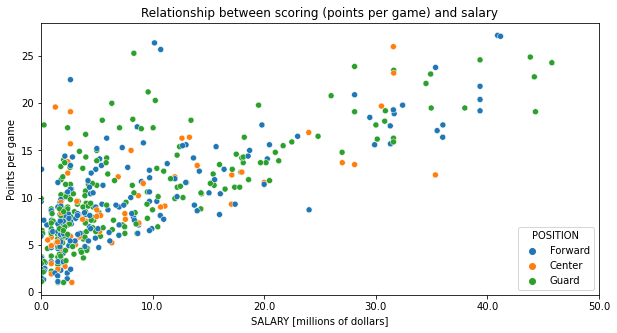

In [75]:
plt.rcParams['figure.figsize'] = [10, 5]
graph=sns.scatterplot(x='SALARY', y='PTS',hue="POSITION",data=working_df)
plt.xticks(graph.get_xticks(), graph.get_xticks() / 1000000)
plt.xlim(left=0)
plt.xlabel('SALARY [millions of dollars]')
plt.ylabel('Points per game')
graph.set_title("Relationship between scoring (points per game) and salary")
plt.show()

3- Now plot assists-vs-salary and rebounding-vs-salary

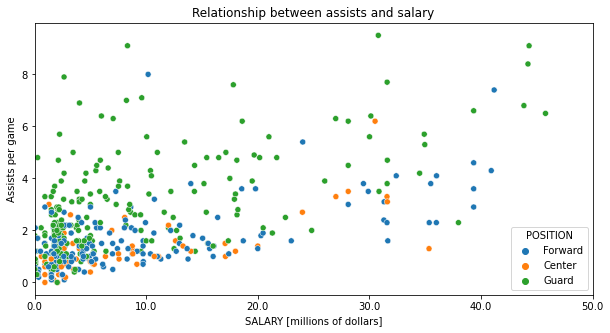

In [76]:
graph=sns.scatterplot(x='SALARY', y='AST',hue="POSITION",data=working_df)
graph.set_title("Relationship between assists and salary")
plt.xticks(graph.get_xticks(), graph.get_xticks() / 1000000)
plt.xlim(left=0)
plt.xlabel('SALARY [millions of dollars]')
plt.ylabel('Assists per game')

plt.show()

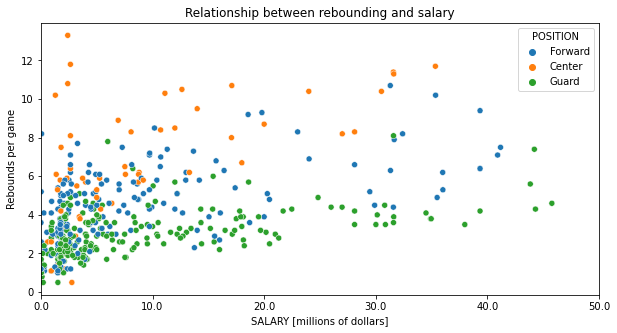

In [77]:
graph=sns.scatterplot(x='SALARY', y='REB',hue="POSITION",data=working_df)
graph.set_title("Relationship between rebounding and salary")
plt.xticks(graph.get_xticks(), graph.get_xticks() / 1000000)
plt.xlim(left=0)
plt.xlabel('SALARY [millions of dollars]')
plt.ylabel('Rebounds per game')
plt.show()

4- When NBA players enter the league, they have low value salaries during what is called their "rookie contract". This means that it doesn't matter how well the player performs, they can't have large salaries. This can distort our understanding of how much teams value each skill, as a player could score 50 points a game and still earn just a couple of millions. So, lets now plot points, assists and rebounding vs salary, but only for players that have more than 4 years of experience (the typical length of a rookie contract)

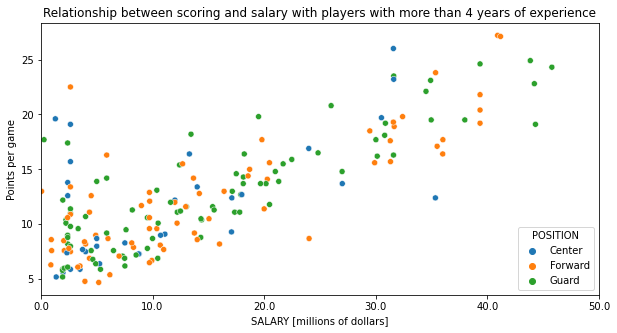

In [78]:

graph=sns.scatterplot(x='SALARY', y='PTS',hue="POSITION",data=working_df[working_df['YEARS_OF_EXPERIENCE']>4])
plt.xticks(graph.get_xticks(), graph.get_xticks() / 1000000)
plt.xlim(left=0)
plt.xlabel('SALARY [millions of dollars]')
plt.ylabel('Points per game')

graph.set_title("Relationship between scoring and salary with players with more than 4 years of experience")
plt.show()

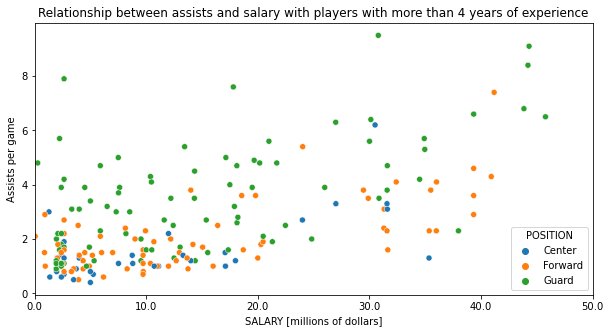

In [79]:
graph=sns.scatterplot(x='SALARY', y='AST',hue="POSITION",data=working_df[working_df['YEARS_OF_EXPERIENCE']>4])
graph.set_title("Relationship between assists and salary with players with more than 4 years of experience")
plt.xticks(graph.get_xticks(), graph.get_xticks() / 1000000)
plt.xlim(left=0)
plt.xlabel('SALARY [millions of dollars]')
plt.ylabel('Assists per game')

plt.show()

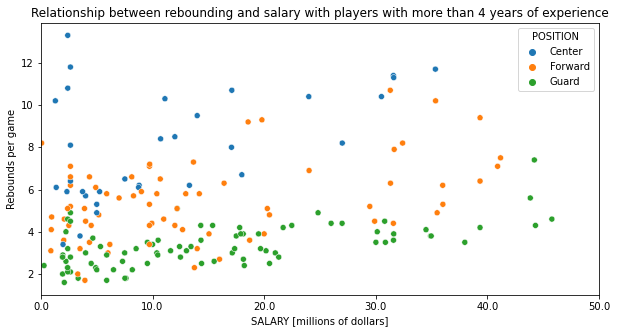

In [80]:
graph=sns.scatterplot(x='SALARY', y='REB',hue="POSITION",data=working_df[working_df['YEARS_OF_EXPERIENCE']>4])
graph.set_title("Relationship between rebounding and salary with players with more than 4 years of experience")
plt.xticks(graph.get_xticks(), graph.get_xticks() / 1000000)
plt.xlim(left=0)
plt.xlabel('SALARY [millions of dollars]')
plt.ylabel('Rebounds per game')
plt.show()

5- Plot the scoring average grouped by position, we want to be able to see median, quartiles, etc 

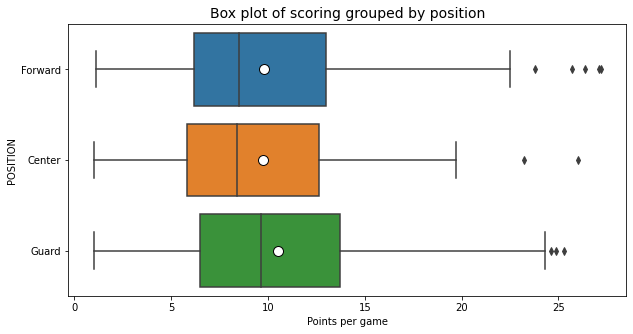

In [81]:
sns.boxplot(x="PTS",
            y="POSITION", 
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
            data=working_df)
plt.title('Box plot of scoring grouped by position', size=14)
plt.xlabel('Points per game')
plt.show()

6- Plot the Height distribution of all players

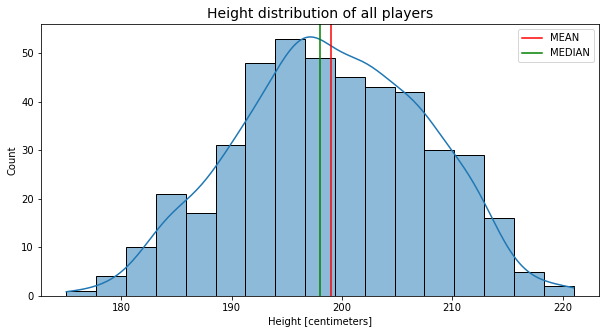

In [82]:
sns.histplot(x='HEIGHT',data=working_df,kde=True,bins=17,stat='count')
plt.axvline(working_df['HEIGHT'].mean(),color='red', label="MEAN")
plt.axvline(working_df['HEIGHT'].median(),color='green', label="MEDIAN")
plt.legend()
plt.title('Height distribution of all players', size=14)
plt.xlabel('Height [centimeters]')
plt.show()


OPTIONAL: Can you find a way to draw a world map and show how many active players per country the NBA has? [Example](https://i.redd.it/8qymui9fnin71.jpg)

In [83]:
def world_map(working_df):
    '''
    This function read the naturalearth_lowres file from geopandas and replace all the countries name that doesnt 
    merge  with the nba dataframe countries. Then creates a new column that store the frequency of each country in all
    the nba data frame and merge the world data frame to the nba data frame.
    '''
    world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
    world=world[['name','geometry']]
    world=world.rename(columns={'name': 'COUNTRY'})
    world["COUNTRY"]=world["COUNTRY"].str.replace("United States of America","USA",regex=True)
    world["COUNTRY"]=world["COUNTRY"].str.replace("Dominican Rep.","Dominican Republic",regex=True)
    world["COUNTRY"]=world["COUNTRY"].str.replace("Dem. Rep. Congo","DRC",regex=True)
    world["COUNTRY"]=world["COUNTRY"].str.replace("Congo","Republic of the Congo",regex=True)
    world["COUNTRY"]=world["COUNTRY"].str.replace("Bosnia and Herz.","Bosnia and Herzegovina",regex=True)
    world["COUNTRY"]=world["COUNTRY"].str.replace("S. Sudan","South Sudan",regex=True)
    world["COUNTRY"]=world["COUNTRY"].str.replace("Czechia","Czech Republic",regex=True)
    
    working_df['frequency'] = working_df['COUNTRY'].map(working_df['COUNTRY'].value_counts())
    world_merge=working_df.merge(world,on='COUNTRY',how='right')
    merged = gpd.GeoDataFrame(world_merge)
    
    return merged

In [84]:
df_with_world_coordinates=world_map(working_df)

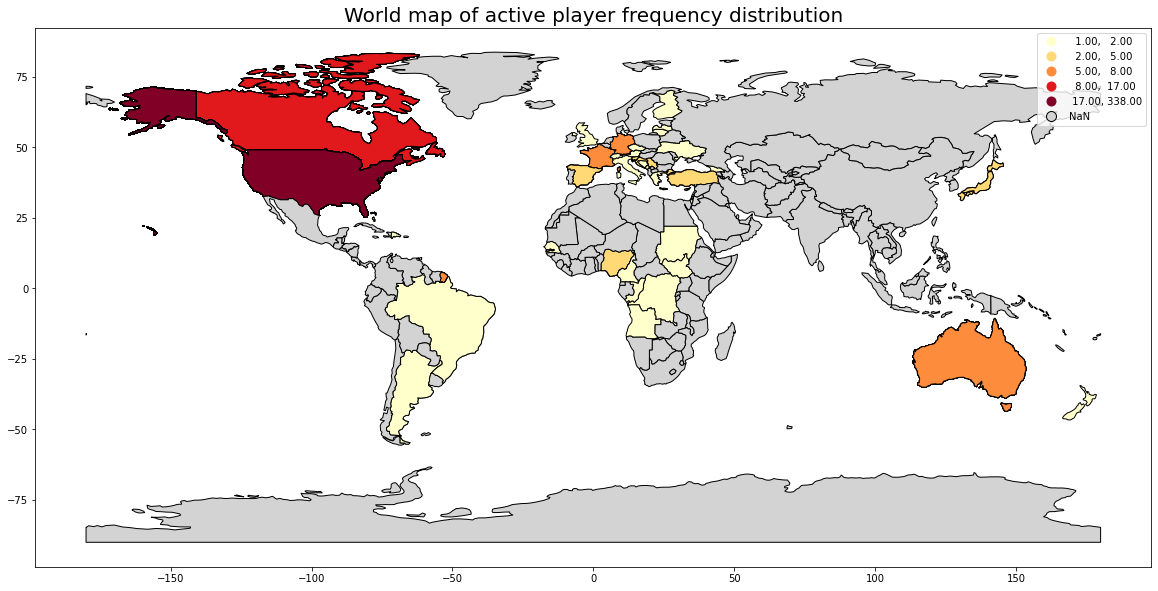

In [87]:
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots(1, 1)
df_with_world_coordinates.plot(column='frequency', ax=ax,k=5, legend=True,scheme="natural_breaks",
                               missing_kwds={'color': 'lightgrey'},edgecolor='k',cmap='YlOrRd')

plt.title('World map of active player frequency distribution', size=20)
plt.show()